In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from factorio.recipe_graph import *
from factorio.types.crafting_environment import CraftingEnvironment
from factorio.types.production_unit import assembling_machine_2, furnace_2
from factorio.types.inserter_unit import inserter_fast
from factorio.types.transport_belt import transport_belt_2

In [3]:
environment = CraftingEnvironment(
    ['electronic-circuit', 'advanced-circuit', 'copper-plate', 'iron-plate', 'steel-plate'],
    assembling_machine_2,
    furnace_2,
    inserter_fast,
    transport_belt_2
)

In [8]:
materials = get_crafting_tree(Material('logistic-robot', 1), environment).get_source_materials()
materials

Materials copper-plate: 12.0; electronic-circuit: 13.5; coal: 2.25; petroleum-gas: 157.5; iron-plate: 11.0; water: 312.5; steel-plate: 3.0; heavy-oil: 30.0

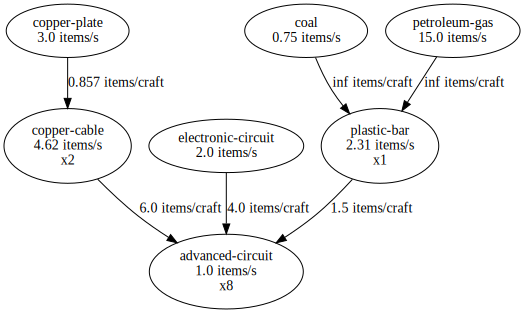

In [7]:
tree = get_crafting_tree(Material('advanced-circuit', 1), environment)
graph = build_crafting_tree_graph(tree)
graph

In [9]:
total_producers = 0
for step in tree.iterate_all_steps():
    if not step.is_source_step():
        total_producers += step.config.producers_amount
total_producers

34

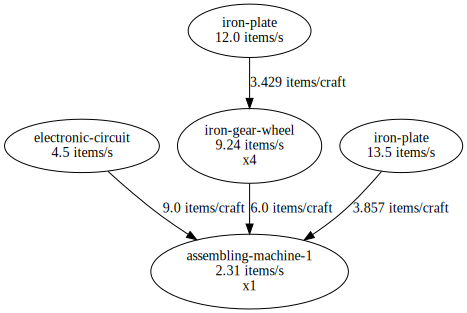

In [15]:
build_recipe_graph(Material('assembling-machine-1', 1), environment)

WARNING! production config cannot support ingredient rate = 60.0 for output
WARNING! production config cannot support ingredient rate = 48.75 for output


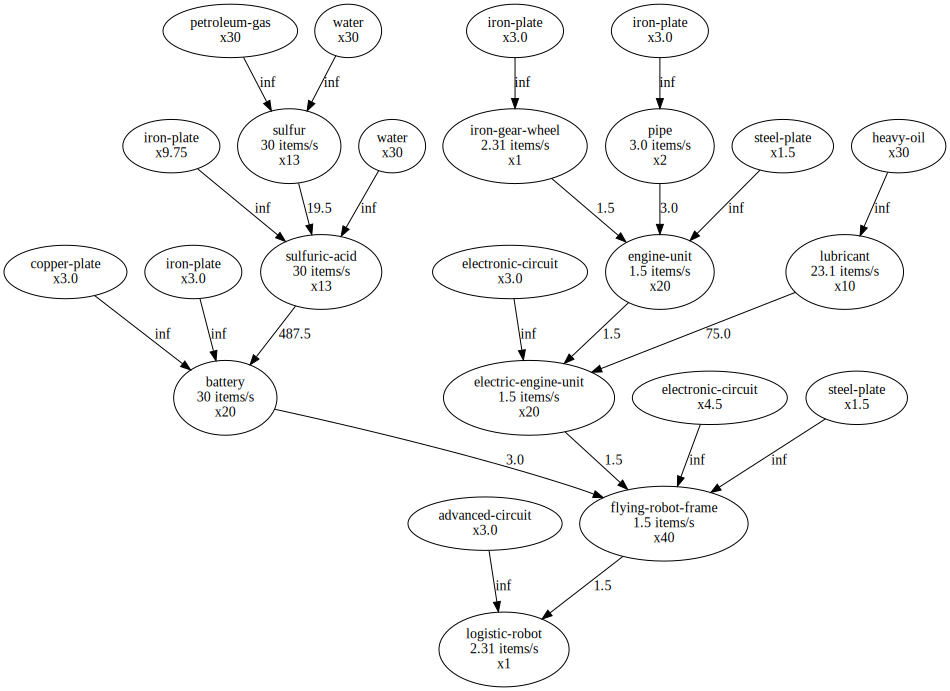

In [7]:
# print(get_basic_materials(Material('logistic-robot', 1), crafting_environment))
graph = build_recipe_graph(Material('logistic-robot', 1/60), environment)
graph

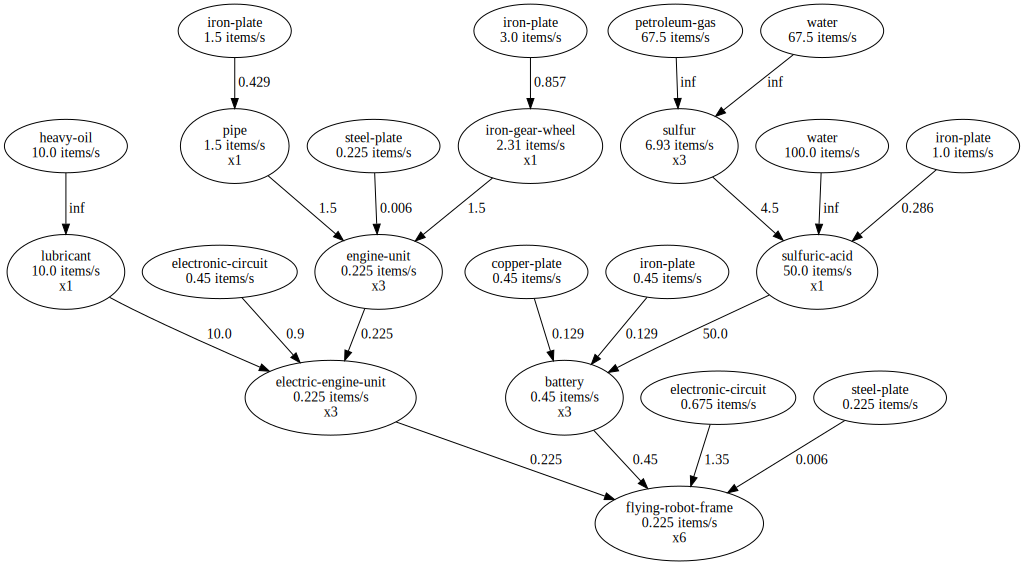

In [13]:
build_recipe_graph(Material('flying-robot-frame', 1/5), environment)

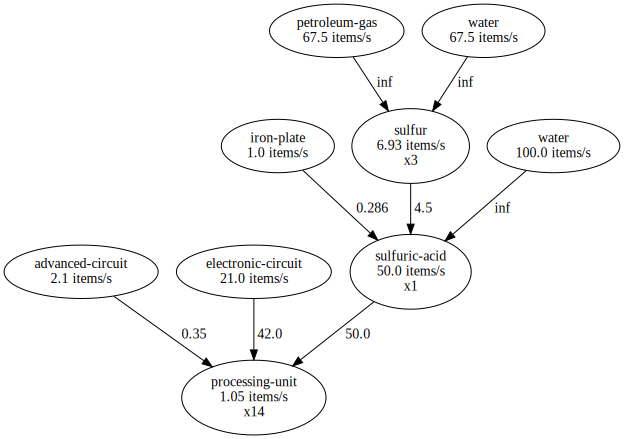

In [14]:
build_recipe_graph(Material('processing-unit', 1), environment)

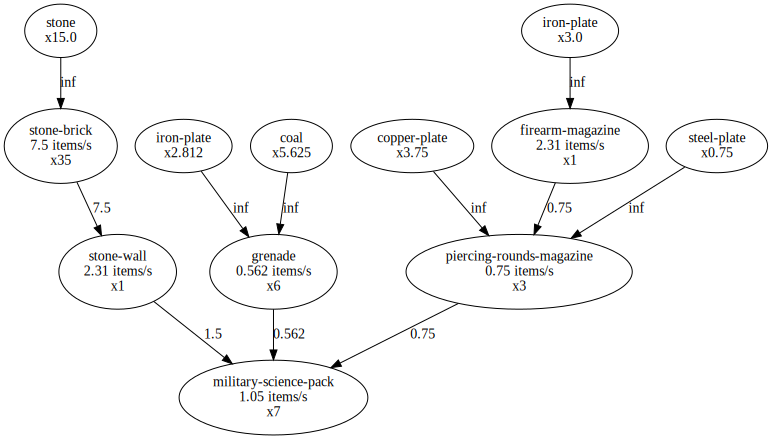

In [9]:
build_recipe_graph(Material("military-science-pack", 1), environment)

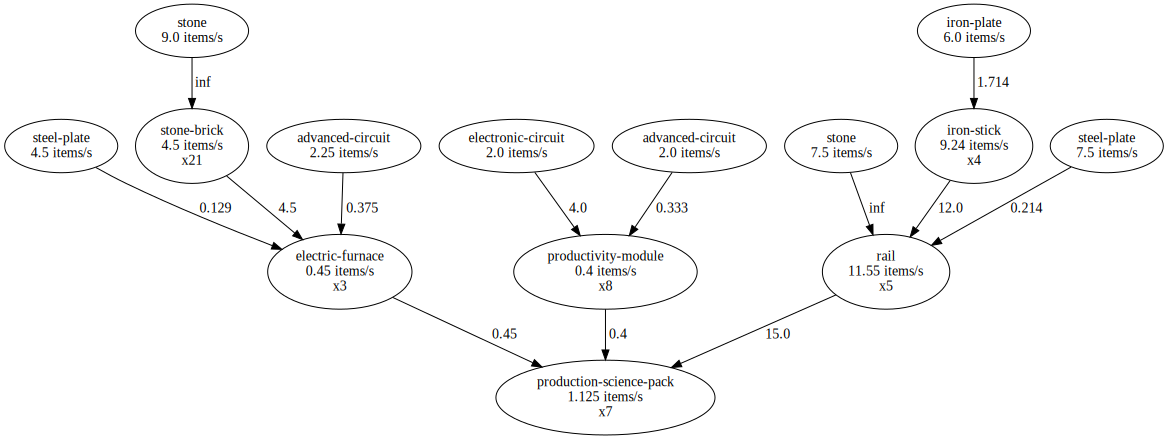

In [4]:
build_recipe_graph(Material("production-science-pack", 1), environment)

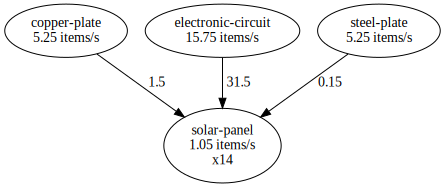

In [6]:
build_recipe_graph(Material("solar-panel", 1), environment)

In [5]:
recipes_info['flying-robot-frame'].get_required()

Materials battery: 2; electric-engine-unit: 1; electronic-circuit: 3; steel-plate: 1

In [18]:
get_basic_materials(Material('electronic-circuit', 90))

WARNING! production config cannot support ingredient rate = 90.0 for output
WARNING! production config cannot support ingredient rate = 57.0 for output
WARNING! production config cannot support ingredient rate = 19.0 for output
WARNING! production config cannot support ingredient rate = 19.0 for output


Materials copper-ore: 15.0; iron-ore: 15.0

In [19]:
from factorio.types.transport_belt import transport_belt_2
get_basic_materials(transport_belt_2 * 10, environment)

WARNING! production config cannot support ingredient rate = 65.0 for output
WARNING! production config cannot support ingredient rate = 16.0 for output


Materials iron-plate: 45

Build mall tree

In [30]:
from factorio.additional_configurations import config_infinite_input_output

mall_root_step = CraftingStep(config_infinite_input_output)
mall_environment = crafting_environment

mall_items_list = [
    "inserter",
    "assembling-machine-1",
    "long-handed-inserter",
    "transport-belt",
    "fast-transport-belt",
    "",
    "pipe",
    "pipe-to-ground",
    "underground-belt",
    "splitter",
]

for mall_item_id in mall_items_list:
    if mall_item_id not in recipes_info:
        print(f'cannot find "{mall_item_id}"')
        continue
    crafting_tree = get_crafting_tree(Material(mall_item_id, 1), mall_environment)
    mall_root_step.previous_steps.append(crafting_tree)

cannot find ""
WARNING! production config cannot support ingredient rate = 20.0 for output


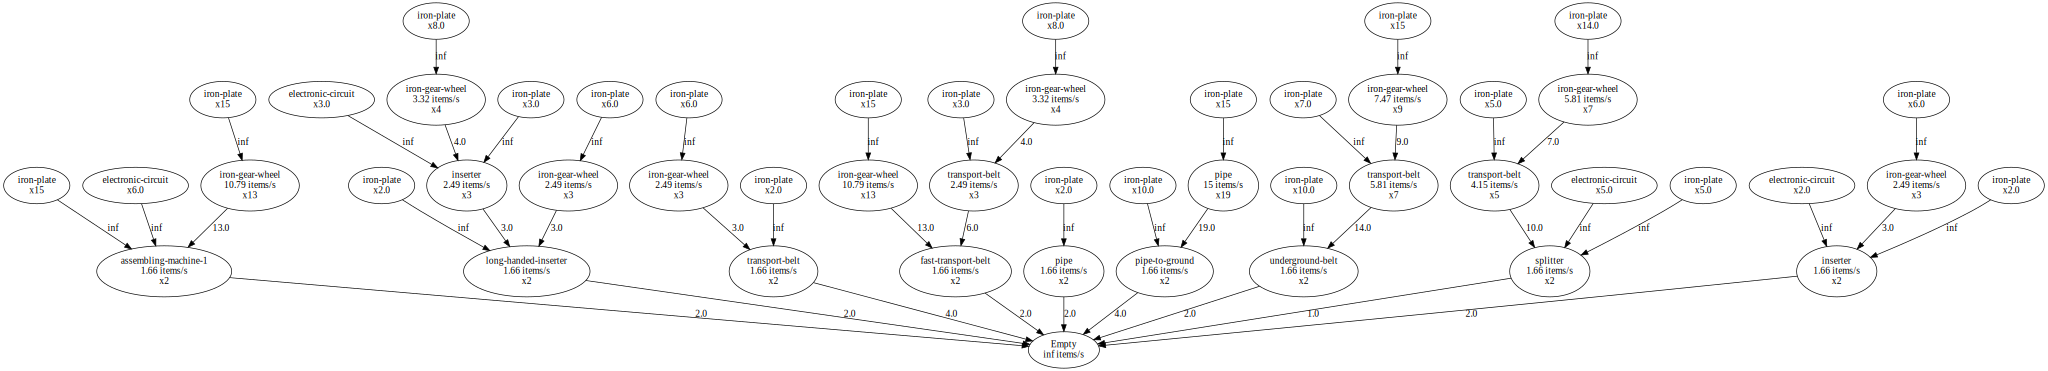

In [31]:
mall_graph = build_crafting_tree_graph(mall_root_step)
mall_graph

In [33]:
mall_graph.render("basic_mall", 'graph', format='png')

'graph\\basic_mall.png'

In [34]:
total_materials = MaterialCollection()
for step in mall_root_step.iterate_all_steps():
    if step.is_source_step():
        total_materials += step.config.get_results()
total_materials

Materials electronic-circuit: 16.0; iron-plate: 174.0

In [44]:
component = "electronic-circuit"

for node in mall_root_step.iterate_all_steps():
    if node.get_results().first().id == component:
        if node.next_step is None: continue
        print(node.next_step)
        print()

Materials inserter: 2.0
	Materials electronic-circuit: inf
	Materials iron-gear-wheel: 3.0
		Materials iron-plate: inf
	Materials iron-plate: inf


Materials assembling-machine-1: 2.0
	Materials electronic-circuit: inf
	Materials iron-gear-wheel: 13.0
		Materials iron-plate: inf
	Materials iron-plate: inf


Materials inserter: 3.0
	Materials electronic-circuit: inf
	Materials iron-gear-wheel: 4.0
		Materials iron-plate: inf
	Materials iron-plate: inf


Materials splitter: 1.0
	Materials electronic-circuit: inf
	Materials iron-plate: inf
	Materials transport-belt: 10.0
		Materials iron-gear-wheel: 7.0
			Materials iron-plate: inf
		Materials iron-plate: inf




In [ ]:
for 

In [30]:
print(mall_graph.node("89"))

None


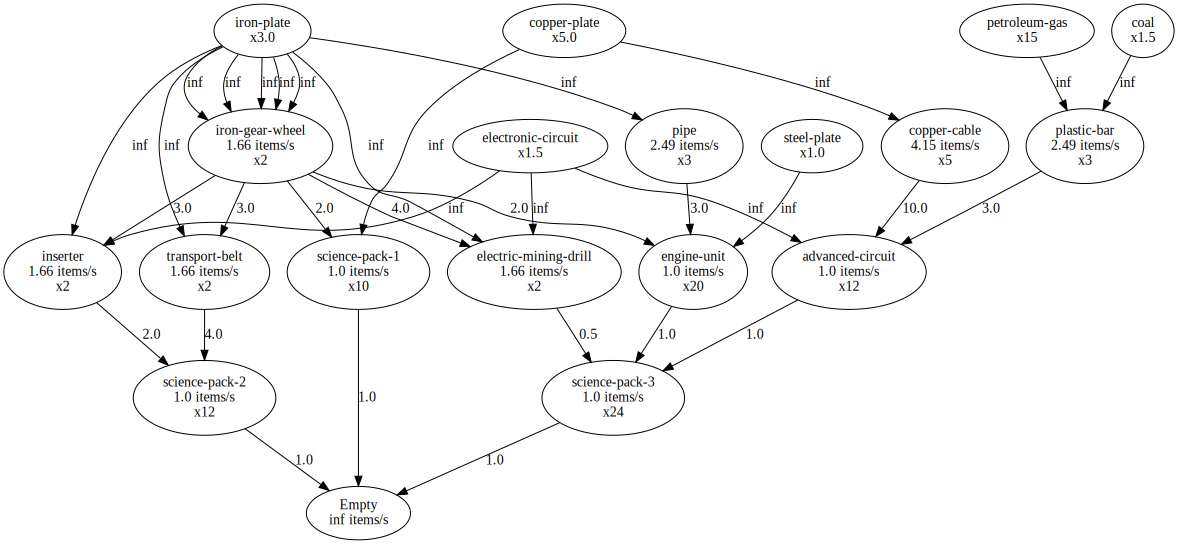

In [46]:
science_root = CraftingStep(config_infinite_input_output)
science_items = [
    "science-pack-1",
    "science-pack-2",
    "science-pack-3",
]
for item in science_items:
    science_root.previous_steps.append(get_crafting_tree(Material(item, 1), crafting_environment))
science_graph = get_crafting_graph(science_root)
science_graph

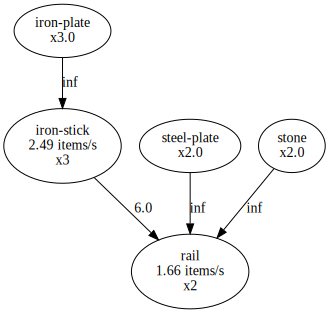

In [36]:
build_recipe_graph(Material("rail"), crafting_environment)

In [39]:
recipes_info["iron-stick"]

Recipe(time=0.5, ingredients=Materials iron-plate: 1, result=Materials iron-stick: 2, global_id=95)